Nulls durch merge

In [2]:
import pandas as pd

In [6]:
chefmozparking = pd.read_csv('./Data/chefmozparking.csv')
chefmozrating = pd.read_csv('./Data/rating_final.csv')

FileNotFoundError: [Errno 2] No such file or directory: './Data/chefmozparking.csv'

In [49]:
set(chefmozparking.placeID.unique()) - set(chefmozrating.placeID.unique())

{np.int64(132012),
 np.int64(132023),
 np.int64(132024),
 np.int64(132026),
 np.int64(132030),
 np.int64(132031),
 np.int64(132107),
 np.int64(132111),
 np.int64(132155),
 np.int64(132157),
 np.int64(132159),
 np.int64(132160),
 np.int64(132161),
 np.int64(132164),
 np.int64(132177),
 np.int64(132182),
 np.int64(132184),
 np.int64(132204),
 np.int64(132206),
 np.int64(132207),
 np.int64(132220),
 np.int64(132231),
 np.int64(132237),
 np.int64(132243),
 np.int64(132281),
 np.int64(132289),
 np.int64(132292),
 np.int64(132296),
 np.int64(132297),
 np.int64(132302),
 np.int64(132326),
 np.int64(132333),
 np.int64(132355),
 np.int64(132377),
 np.int64(132392),
 np.int64(132396),
 np.int64(132399),
 np.int64(132409),
 np.int64(132436),
 np.int64(132437),
 np.int64(132439),
 np.int64(132442),
 np.int64(132443),
 np.int64(132449),
 np.int64(132468),
 np.int64(132478),
 np.int64(132479),
 np.int64(132481),
 np.int64(132482),
 np.int64(132483),
 np.int64(132484),
 np.int64(132487),
 np.int64(13

In [50]:
merged = chefmozparking.merge(
    chefmozrating,
    how='left',
    left_on='placeID',
    right_on='placeID'
)

In [51]:
merged[merged.rating.isna()]

placeID    parking_lot userID  rating  food_rating  service_rating
0      135111         public    NaN     NaN          NaN             NaN
1      135110           none    NaN     NaN          NaN             NaN
17     135107           none    NaN     NaN          NaN             NaN
28     135105           none    NaN     NaN          NaN             NaN
36     135103  valet parking    NaN     NaN          NaN             NaN
...       ...            ...    ...     ...          ...             ...
1728   132024         street    NaN     NaN          NaN             NaN
1729   132023            fee    NaN     NaN          NaN             NaN
1730   132023         public    NaN     NaN          NaN             NaN
1731   132012         public    NaN     NaN          NaN             NaN
1732   132012         street    NaN     NaN          NaN             NaN

[572 rows x 6 columns]

Fehlende Werte im Ames Datensatz

In [52]:
ames = pd.read_csv('../Data/AmesHousing.csv')

<Axes: xlabel='Alley', ylabel='Count'>

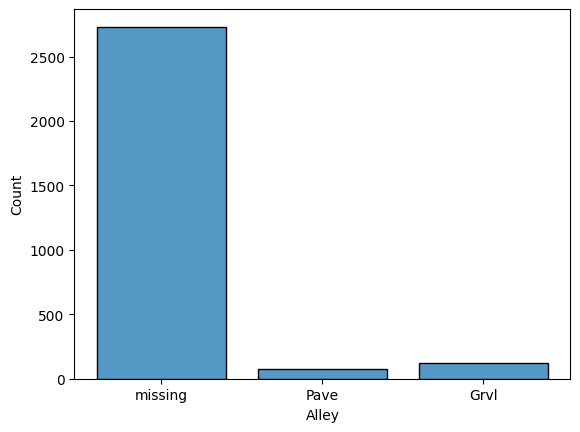

In [53]:
import seaborn as sns
sns.histplot(
    ames.Alley.fillna('missing'),
    shrink=.8,
)

In [54]:
ames[['Alley']].groupby(
    'Alley',
    dropna=False
).size()/ames.Alley.shape

Alley
Grvl    0.040956
Pave    0.026621
NaN     0.932423
dtype: float64

In [55]:
ames['Alley'].fillna('no alley')

0       no alley
1       no alley
2       no alley
3       no alley
4       no alley
          ...   
2925    no alley
2926    no alley
2927    no alley
2928    no alley
2929    no alley
Name: Alley, Length: 2930, dtype: object

Visualizing missing values

In [56]:
scat = pd.read_csv(
    '../Data/scat.csv'
)
scat.drop(columns='Unnamed: 0', inplace=True)

In [57]:
missing_values = scat.isnull()
missing_values

Species  Month   Year   Site  Location    Age  Number  Length  Diameter  \
0      False  False  False  False     False  False   False   False     False   
1      False  False  False  False     False  False   False   False     False   
2      False  False  False  False     False  False   False   False     False   
3      False  False  False  False     False  False   False   False     False   
4      False  False  False  False     False  False   False   False     False   
..       ...    ...    ...    ...       ...    ...     ...     ...       ...   
105    False  False  False  False     False  False   False   False     False   
106    False  False  False  False     False  False   False   False     False   
107    False  False  False  False     False  False   False   False     False   
108    False  False  False  False     False  False   False   False     False   
109    False  False  False  False     False  False   False   False     False   

     Taper     TI   Mass   d13C   d15N     CN  ropey  segmented   flat  scrape  
0    False  False  False  False  False  False  False      False  False   False  
1    False  False  False  False  False  False  False      False  False   False  
2    False  False  False  False  False  False  False      False  False   False  
3    False  False  False  False  False  False  False      False  False   False  
4    False  False  False  False  False  False  False      False  False   False  
..     ...    ...    ...    ...    ...    ...    ...        ...    ...     ...  
105  False  False  False  False  False  False  False      False  False   False  
106  False  False  False  False  False  False  False      False  False   False  
107  False  False  False  False  False  False  False      False  False   False  
108  False  False  False  False  False  False  False      False  False   False  
109  False  False  False  False  False  False  False      False  False   False  

[110 rows x 19 columns]

([], [])

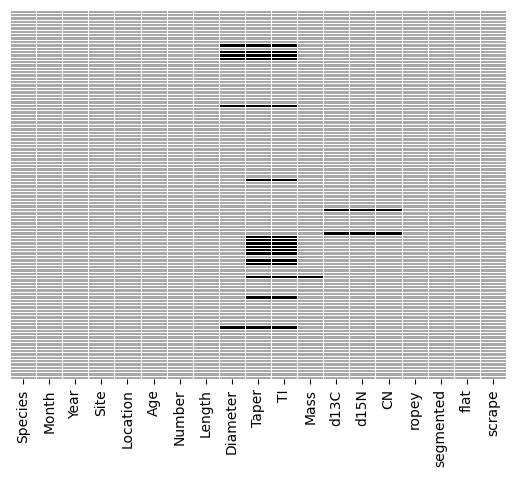

In [58]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['darkgrey', 'black'])
sns.heatmap(
    missing_values,
    cbar=False,
    cmap=cmap,
    linewidths=0.5
)
plt.yticks([])

In [59]:
cols_missing_values = [col for col in missing_values.columns if missing_values[col].any()]
cols_missing_values

['Diameter', 'Taper', 'TI', 'Mass', 'd13C', 'd15N', 'CN']

In [60]:
missing_values = scat.isnull()
co_occurrence = missing_values[cols_missing_values].groupby(cols_missing_values).size()
co_occurrence = co_occurrence.reset_index()
co_occurrence.columns = cols_missing_values + ['size']
co_occurrence


Diameter  Taper     TI   Mass   d13C   d15N     CN  size
0     False  False  False  False  False  False  False    91
1     False  False  False  False   True   True   True     2
2     False   True   True  False  False  False  False    10
3     False   True   True   True  False  False  False     1
4      True   True   True  False  False  False  False     6

In [61]:
co_occurrence = co_occurrence[
    co_occurrence[cols_missing_values].any(axis=1)
]

In [62]:
co_occurrence

Diameter  Taper     TI   Mass   d13C   d15N     CN  size
1     False  False  False  False   True   True   True     2
2     False   True   True  False  False  False  False    10
3     False   True   True   True  False  False  False     1
4      True   True   True  False  False  False  False     6

In [63]:
labels = []
for index, row in co_occurrence.iterrows():
    valid_columns = [column for column, value in row.items() if value]
    valid_columns.pop()
    labels.append('_'.join(valid_columns))
labels



['d13C_d15N_CN', 'Taper_TI', 'Taper_TI_Mass', 'Diameter_Taper_TI']

In [64]:
co_occurrence['labels'] = labels

/var/folders/g0/jwbp_psj72l2k31ddg94tmm80000gn/T/ipykernel_37440/3384981296.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  co_occurrence['labels'] = labels


In [65]:
co_occurrence = co_occurrence.sort_values(
    by='size',
    ascending=False
)

In [66]:
co_occurrence

Diameter  Taper     TI   Mass   d13C   d15N     CN  size             labels
2     False   True   True  False  False  False  False    10           Taper_TI
4      True   True   True  False  False  False  False     6  Diameter_Taper_TI
1     False  False  False  False   True   True   True     2       d13C_d15N_CN
3     False   True   True   True  False  False  False     1      Taper_TI_Mass

<Axes: xlabel='labels', ylabel='size'>

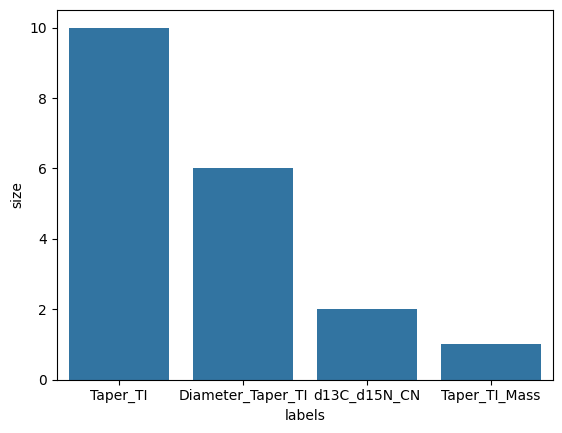

In [67]:
sns.barplot(
    x = co_occurrence['labels'],
    y = co_occurrence['size']
)

Scatterplot für fehlende Werte

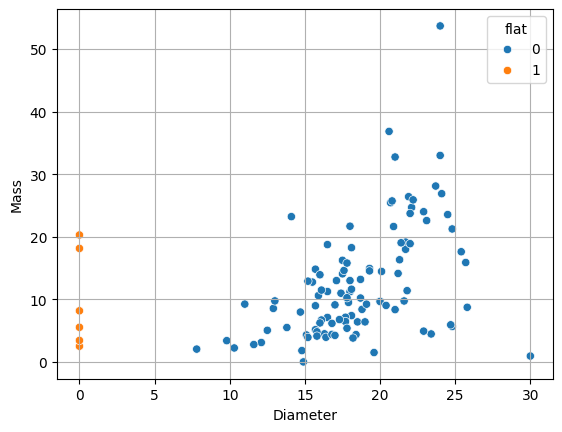

In [68]:
scat_filled = scat.copy()
scat_filled = scat_filled.fillna(0)
sns.scatterplot(
    x=scat_filled.Diameter,
    y=scat_filled.Mass,
    hue=scat_filled.flat
)
plt.grid()

PCA for missing values

In [69]:
chicago_raw = pd.read_parquet('../Data/chicago_train_data.parquet')

In [70]:
chicago_raw

Austin (Blue Line)  Harlem/Lake (Green Line)  \
date                                                       
2001-01-01               0.290                     0.633   
2001-01-02               1.240                     2.950   
2001-01-03               1.412                     3.107   
2001-01-04               1.388                     3.259   
2001-01-05               1.465                     3.357   
...                        ...                       ...   
2016-09-07               2.307                     3.848   
2016-09-08               2.318                     4.036   
2016-09-09               2.267                     4.056   
2016-09-10               1.036                     2.221   
2016-09-11               0.778                     1.774   

            Pulaski (Green Line)  \
date                               
2001-01-01                 0.483   
2001-01-02                 1.230   
2001-01-03                 1.394   
2001-01-04                 1.370   
2001-01-05                 1.453   
...                          ...   
2016-09-07                 1.487   
2016-09-08                 1.491   
2016-09-09                 1.581   
2016-09-10                 1.037   
2016-09-11                 0.733   

            Quincy/Wells (Brown, Orange, Purple & Pink Lines)  \
date                                                            
2001-01-01                                              0.374   
2001-01-02                                              7.737   
2001-01-03                                              8.051   
2001-01-04                                              8.027   
2001-01-05                                              7.653   
...                                                       ...   
2016-09-07                                              8.473   
2016-09-08                                              8.430   
2016-09-09                                              7.866   
2016-09-10                                              1.628   
2016-09-11                                              1.380   

            Davis (Purple Line)  Belmont (Blue Line)  Jackson (Blue Line)  \
date                                                                        
2001-01-01                0.804                1.165                0.649   
2001-01-02                3.199                4.046                5.777   
2001-01-03                3.476                4.153                6.482   
2001-01-04                3.540                4.362                6.766   
2001-01-05                3.684                4.400                6.308   
...                         ...                  ...                  ...   
2016-09-07                3.555                5.879                8.275   
2016-09-08                3.874                6.024                8.581   
2016-09-09                3.712                5.925                7.427   
2016-09-10                2.641                3.306                3.218   
2016-09-11                1.933                2.684                2.322   

            Sheridan (Red Line)  Damen (Brown Line)  Morse (Red Line)  ...  \
date                                                                   ...   
2001-01-01                1.116               0.411             1.698  ...   
2001-01-02                3.854               1.823             3.807  ...   
2001-01-03                4.147               1.905             4.047  ...   
2001-01-04                4.202               2.008             4.107  ...   
2001-01-05                4.404               2.088             4.381  ...   
...                         ...                 ...               ...  ...   
2016-09-07                5.859               3.230             5.009  ...   
2016-09-08                6.109               3.307             5.161  ...   
2016-09-09                5.978               3.191             5.123  ...   
2016-09-10                3.910               1.554     

In [71]:
columns_with_na_values = chicago_raw.columns[chicago_raw.isna().any()].tolist()

In [72]:
masked_chicago_raw_data = (chicago_raw.isna()).astype(int)

In [73]:
percentage_missing_per_date = masked_chicago_raw_data.sum(axis=1) / masked_chicago_raw_data.shape[1]

In [74]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_masked_chicago_raw_data = pca.fit_transform(masked_chicago_raw_data)

<Axes: >

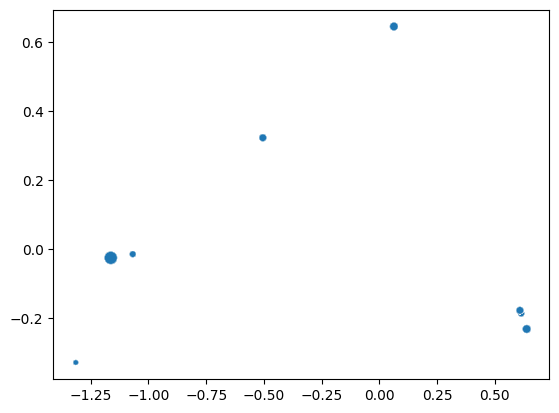

In [75]:
sns.scatterplot(
    x = pca_masked_chicago_raw_data[:, 0],
    y = pca_masked_chicago_raw_data[:, 1],
    alpha=0.4,
    s = percentage_missing_per_date*1000
)

In [76]:
transposed_masked_chicago_raw_data = masked_chicago_raw_data.T

In [77]:
transposed_masked_chicago_raw_data

date                                               2001-01-01  2001-01-02  \
Austin (Blue Line)                                          0           0   
Harlem/Lake (Green Line)                                    0           0   
Pulaski (Green Line)                                        0           0   
Quincy/Wells (Brown, Orange, Purple & Pink Lines)           0           0   
Davis (Purple Line)                                         0           0   
...                                                       ...         ...   
Homan (Green Line)                                          1           1   
Lake (Red Line)                                             0           0   
Conservatory (Green Line)                                   1           1   
Oakton-Skokie (Yellow Line)                                 1           1   
Cermak-McCormick Place (Green Line)                         1           1   

date                                               2001-01-03  2001-01-04  \
Austin (Blue Line)                                          0           0   
Harlem/Lake (Green Line)                                    0           0   
Pulaski (Green Line)                                        0           0   
Quincy/Wells (Brown, Orange, Purple & Pink Lines)           0           0   
Davis (Purple Line)                                         0           0   
...                                                       ...         ...   
Homan (Green Line)                                          1           1   
Lake (Red Line)                                             0           0   
Conservatory (Green Line)                                   1           1   
Oakton-Skokie (Yellow Line)                                 1           1   
Cermak-McCormick Place (Green Line)                         1           1   

date                                               2001-01-05  2001-01-06  \
Austin (Blue Line)                                          0           0   
Harlem/Lake (Green Line)                                    0           0   
Pulaski (Green Line)                                        0           0   
Quincy/Wells (Brown, Orange, Purple & Pink Lines)           0           0   
Davis (Purple Line)                                         0           0   
...                                                       ...         ...   
Homan (Green Line)                                          1           1   
Lake (Red Line)                                             0           0   
Conservatory (Green Line)                                   1           1   
Oakton-Skokie (Yellow Line)                                 1           1   
Cermak-McCormick Place (Green Line)                         1           1   

date                                               2001-01-07  2001-01-08  \
Austin (Blue Line)                                          0           0   
Harlem/Lake (Green Line)                                    0           0   
Pulaski (Green Line)                                        0           0   
Quincy/Wells (Brown, Orange, Purple & Pink Lines)           0           0   
Davis (Purple Line)                                         0           0   
...                                                       ...         ...   
Homan (Green Line)                                          1           1   
Lake (Red Line)                                             0           0   
Conservatory (Green Line)                                   1           1   
Oakton-Skokie (Yellow Line)                                 1           1   
Cermak-McCormick Place (Green Line)                         1           1   

date                                               2001-01-09  2001-01-10  \
Austin (Blue Line)                                          0           0   
Harlem/Lake (Green Line)                                    0           0   
Pulaski (Green Line)                                        0        

In [78]:
percentage_missing_per_station = transposed_masked_chicago_raw_data.sum(axis=1) / transposed_masked_chicago_raw_data.shape[1]
percentage_missing_per_station

Austin (Blue Line)                                   0.000000
Harlem/Lake (Green Line)                             0.000000
Pulaski (Green Line)                                 0.000000
Quincy/Wells (Brown, Orange, Purple & Pink Lines)    0.000000
Davis (Purple Line)                                  0.000000
                                                       ...   
Homan (Green Line)                                   0.994593
Lake (Red Line)                                      0.000000
Conservatory (Green Line)                            0.026339
Oakton-Skokie (Yellow Line)                          0.716553
Cermak-McCormick Place (Green Line)                  0.891854
Length: 146, dtype: float64

In [79]:
pca_transposed = pca.fit_transform(transposed_masked_chicago_raw_data)

<Axes: >

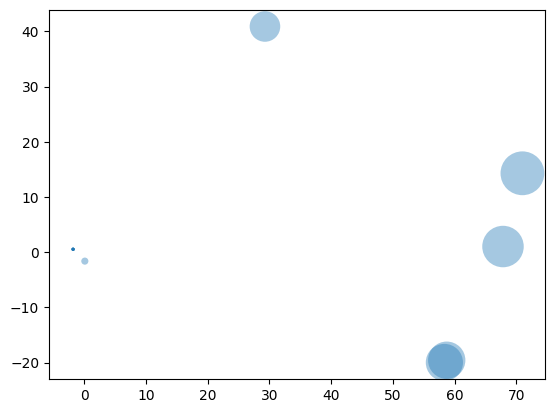

In [80]:
sns.scatterplot(
    x = pca_transposed[:, 0],
    y = pca_transposed[:, 1],
    alpha=0.4,
    s = percentage_missing_per_station*1000
)

<Axes: xlabel='date'>

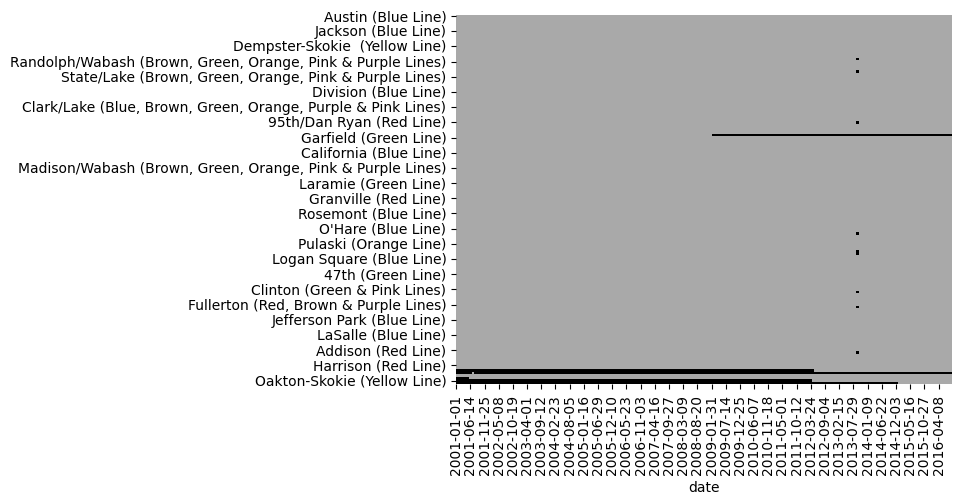

In [81]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['darkgrey', 'black'])
sns.heatmap(
    chicago_raw.isna().T,
    cbar=False,
    cmap=cmap,
    #linewidths=0.5
)

Numerische Zusammenfassung

In [43]:
scat.shape

(110, 19)

In [42]:
scat.isna().sum(axis='rows') / scat.shape[0]

Species      0.000000
Month        0.000000
Year         0.000000
Site         0.000000
Location     0.000000
Age          0.000000
Number       0.000000
Length       0.000000
Diameter     0.054545
Taper        0.154545
TI           0.154545
Mass         0.009091
d13C         0.018182
d15N         0.018182
CN           0.018182
ropey        0.000000
segmented    0.000000
flat         0.000000
scrape       0.000000
dtype: float64

In [45]:
scat.isna().sum(axis='columns') / scat.shape[1]

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
105    0.0
106    0.0
107    0.0
108    0.0
109    0.0
Length: 110, dtype: float64

In [37]:
summary = (scat.isna().astype(int).sum(axis='rows') / scat.shape[0]).sort_values(ascending=False)
summary.index = scat.columns
summary


Species      0.154545
Month        0.154545
Year         0.054545
Site         0.018182
Location     0.018182
Age          0.018182
Number       0.009091
Length       0.000000
Diameter     0.000000
Taper        0.000000
TI           0.000000
Mass         0.000000
d13C         0.000000
d15N         0.000000
CN           0.000000
ropey        0.000000
segmented    0.000000
flat         0.000000
scrape       0.000000
dtype: float64

Baseline Model

In [38]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
dtc = DecisionTreeClassifier(max_depth=4)

In [39]:
scat.columns

Index(['Species', 'Month', 'Year', 'Site', 'Location', 'Age', 'Number',
       'Length', 'Diameter', 'Taper', 'TI', 'Mass', 'd13C', 'd15N', 'CN',
       'ropey', 'segmented', 'flat', 'scrape'],
      dtype='object')

In [40]:
predictor_columns = [
    "Age",
    "Number",
    "Length",
    "Diameter",
    "Taper",
    "TI",
    "Mass",
    "d13C",
    "d15N",
    "CN",
    "ropey",
    "segmented",
    "flat",
    "scrape",
]
target = "Species"

In [41]:
X = scat[predictor_columns]
y = scat[target]

In [42]:
dtc.fit(X,y)

DecisionTreeClassifier(max_depth=4)

[Text(0.5294117647058824, 0.9, 'x[9] <= 8.7\ngini = 0.615\nsamples = 110\nvalue = [57.0, 28.0, 25.0]'),
 Text(0.29411764705882354, 0.7, 'x[8] <= 11.78\ngini = 0.497\nsamples = 83\nvalue = [55, 19, 9]'),
 Text(0.4117647058823529, 0.8, 'True  '),
 Text(0.23529411764705882, 0.5, 'x[6] <= 5.1\ngini = 0.415\nsamples = 74\nvalue = [55, 10, 9]'),
 Text(0.11764705882352941, 0.3, 'x[8] <= 7.86\ngini = 0.631\nsamples = 15\nvalue = [5, 3, 7]'),
 Text(0.058823529411764705, 0.1, 'gini = 0.463\nsamples = 11\nvalue = [4, 0, 7]'),
 Text(0.17647058823529413, 0.1, 'gini = 0.375\nsamples = 4\nvalue = [1, 3, 0]'),
 Text(0.35294117647058826, 0.3, 'x[7] <= -23.565\ngini = 0.267\nsamples = 59\nvalue = [50, 7, 2]'),
 Text(0.29411764705882354, 0.1, 'gini = 0.222\nsamples = 57\nvalue = [50, 5, 2]'),
 Text(0.4117647058823529, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.35294117647058826, 0.5, 'gini = 0.0\nsamples = 9\nvalue = [0, 9, 0]'),
 Text(0.7647058823529411, 0.7, 'x[6] <= 8.835\ngini = 0.53

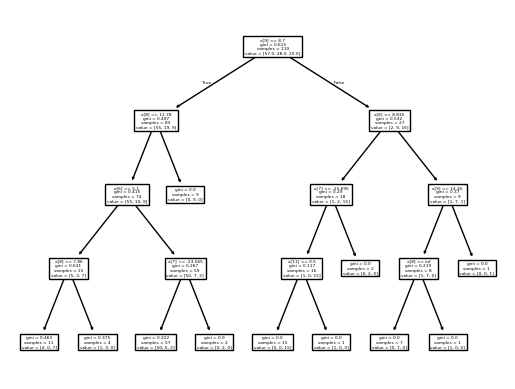

In [43]:
plot_tree(dtc)

Deleting null values

In [82]:
chicago_raw.shape

(5733, 146)

In [45]:
chicago_raw.isna().astype(int).sum(axis='rows').sort_values(ascending=False).head(10)

Homan (Green Line)                     5702
Cermak-McCormick Place (Green Line)    5113
Morgan (Green & Pink Lines)            4138
Oakton-Skokie (Yellow Line)            4108
Washington (Red Line)                  2780
Conservatory (Green Line)               151
Cermak-Chinatown (Red Line)              30
79th (Red Line)                          30
95th/Dan Ryan (Red Line)                 30
Sox-35th (Red Line)                      30
dtype: int64

<Axes: xlabel='date'>

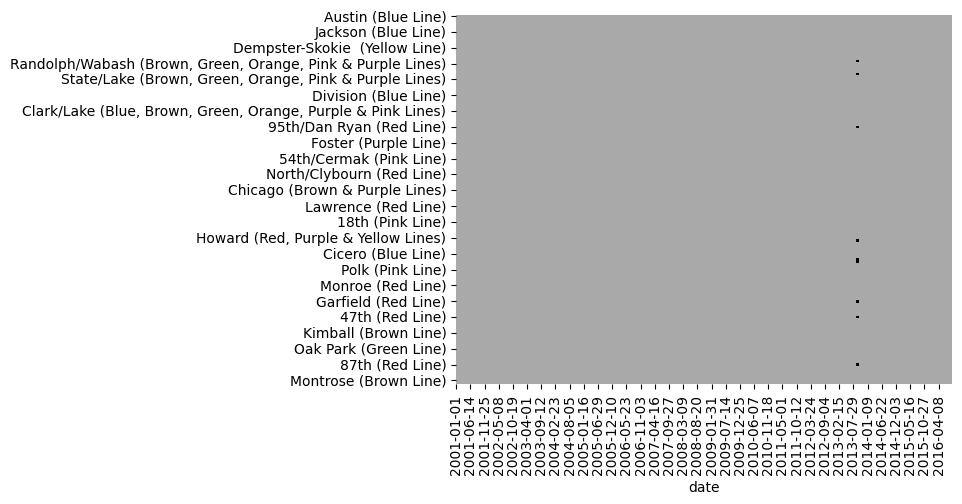

In [46]:
cmap = ListedColormap(['darkgrey', 'black'])
sns.heatmap(
    chicago_raw.dropna(
        axis='columns',
        thresh=chicago_raw.shape[0]-30).isna().T,
    cbar=False,
    cmap=cmap,
    #linewidths=0.5
)

Impute with global mean

In [83]:
indices_of_missing = chicago_raw[chicago_raw['87th (Red Line)'].isna()].index.tolist()

In [84]:
chicago_raw_nona = chicago_raw.dropna(
    axis='columns',
    thresh=5733-30
)
chicago_raw_nona.mean().mean()

np.float64(3.301028425856202)

<Axes: xlabel='date'>

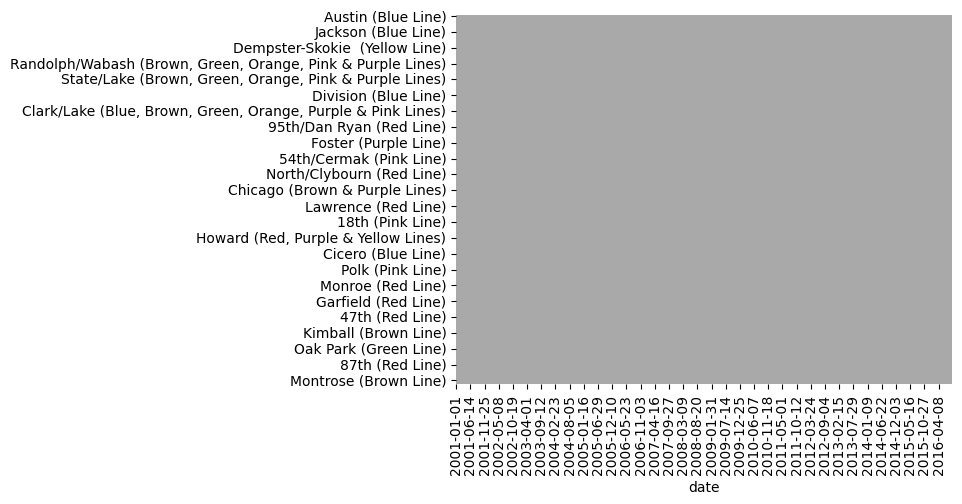

In [ ]:
from sklearn.impute import SimpleImputer
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['darkgrey', 'black'])

imp_constant = SimpleImputer(
    missing_values=pd.NA,
    strategy='constant',
    fill_value=chicago_raw_nona.mean().mean()
)
chicago_raw_nona = pd.DataFrame(
    imp_constant.fit_transform(chicago_raw_nona),
    columns = chicago_raw_nona.columns,
    index=chicago_raw_nona.index
)
sns.heatmap(
    chicago_raw_nona.isna().T,
    cbar=False,
    cmap=cmap,
    #linewidths=0.5
)

<Axes: xlabel='date'>

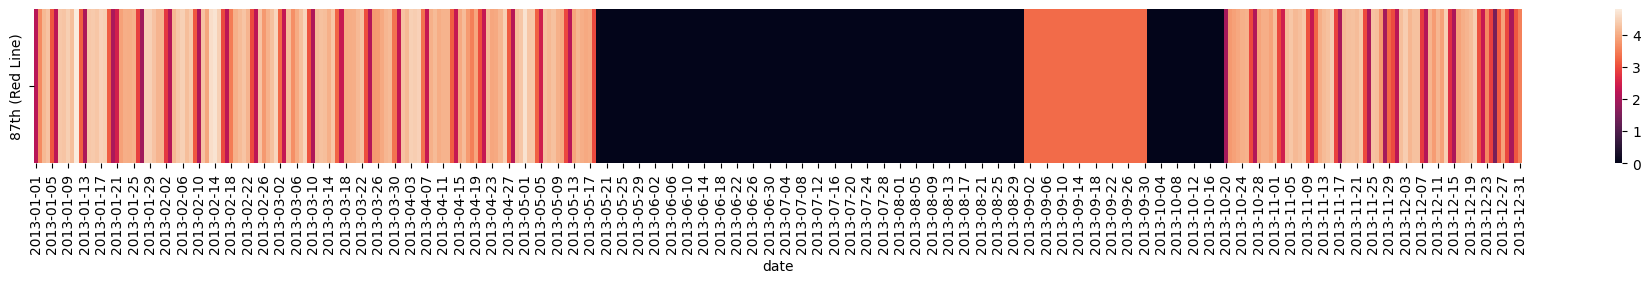

In [86]:
plt.figure(figsize=(24, 2))

sns.heatmap(
    pd.DataFrame(chicago_raw_nona.loc['2013-01-01':'2013-12-31', '87th (Red Line)']).T
)


In [50]:
chicago_raw.loc[indices_of_missing[0], '87th (Red Line)']

np.float64(nan)

In [51]:
chicago_raw_nona.loc[indices_of_missing[0], '87th (Red Line)']

np.float64(3.301028425856202)

<Axes: xlabel='date'>

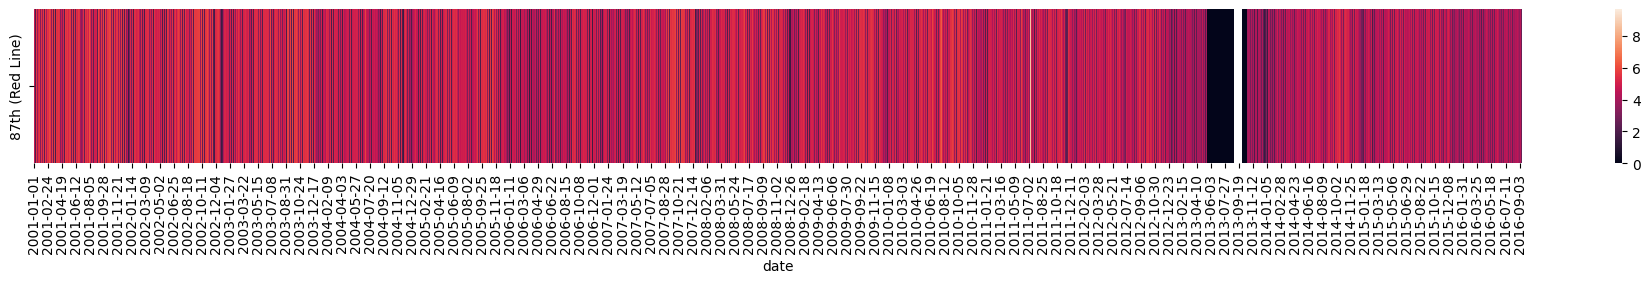

In [52]:
plt.figure(figsize=(24, 2))
sns.heatmap(
    chicago_raw[['87th (Red Line)']].T,
    #linewidths=0.5
)


<Axes: xlabel='date'>

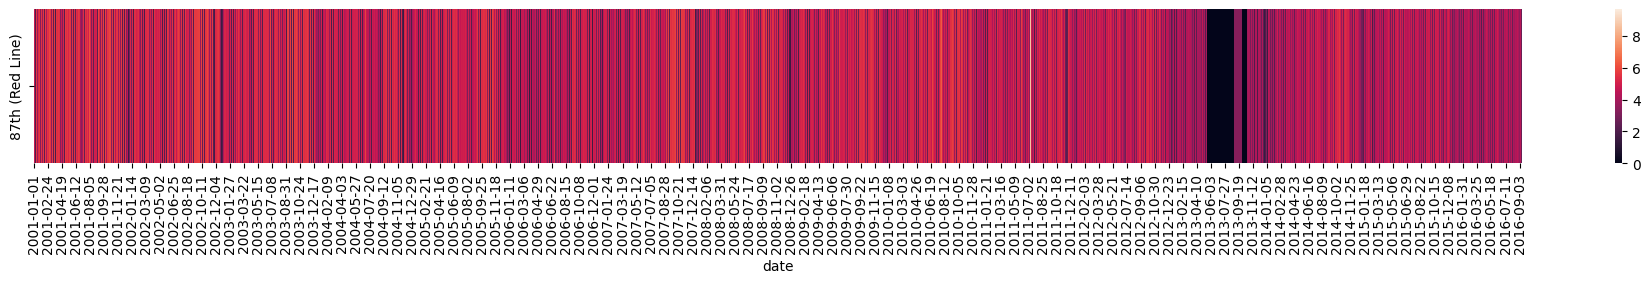

In [53]:
plt.figure(figsize=(24, 2))

sns.heatmap(
    chicago_raw_nona[['87th (Red Line)']].T,
    #linewidths=0.5
)


Impute with concept most common

<Axes: xlabel='date'>

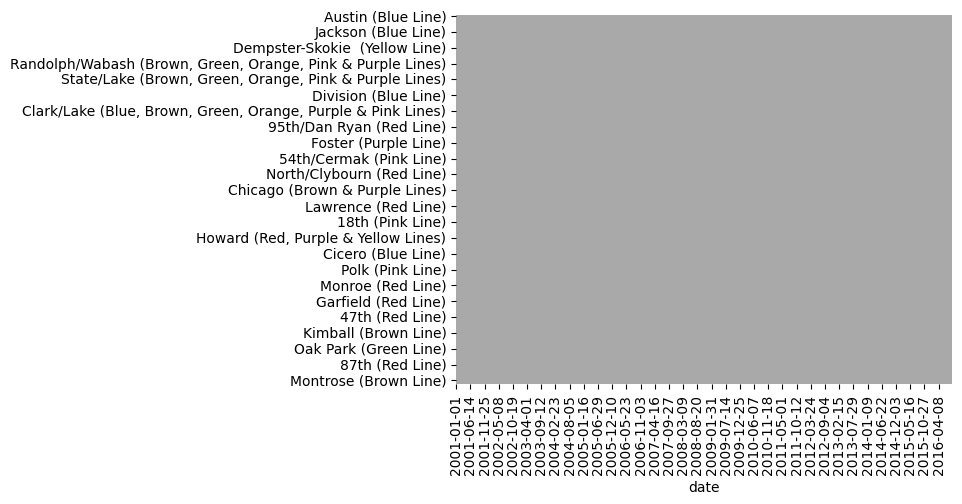

In [54]:

from sklearn.impute import SimpleImputer
chicago_raw_nona = chicago_raw.dropna(
    axis='columns',
    thresh=5733-30
)
imp_mean = SimpleImputer(
    missing_values=pd.NA,
    strategy='mean'
)
chicago_raw_nona = pd.DataFrame(
    imp_mean.fit_transform(chicago_raw_nona),
    columns = chicago_raw_nona.columns,
    index=chicago_raw_nona.index
)
sns.heatmap(
    chicago_raw_nona.isna().T,
    cbar=False,
    cmap=cmap,
    #linewidths=0.5
)

<Axes: xlabel='date'>

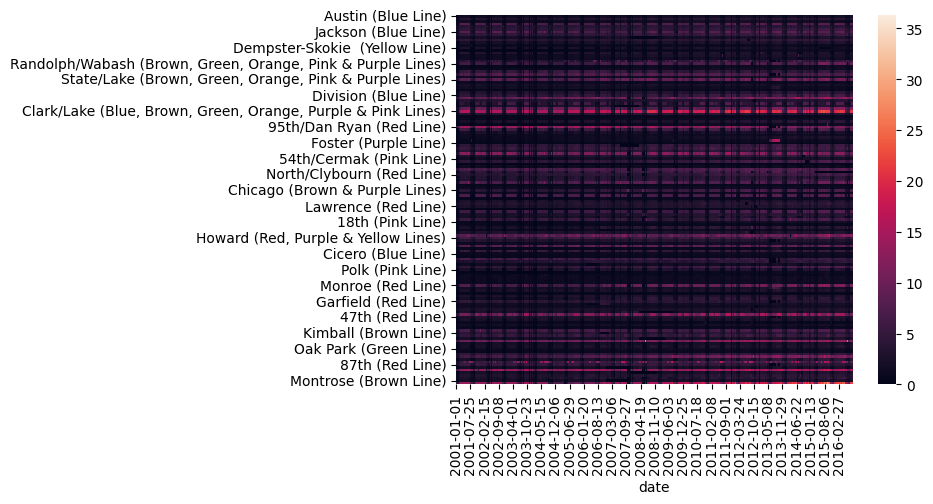

In [55]:
sns.heatmap(
    chicago_raw_nona.T
)

<Axes: xlabel='date'>

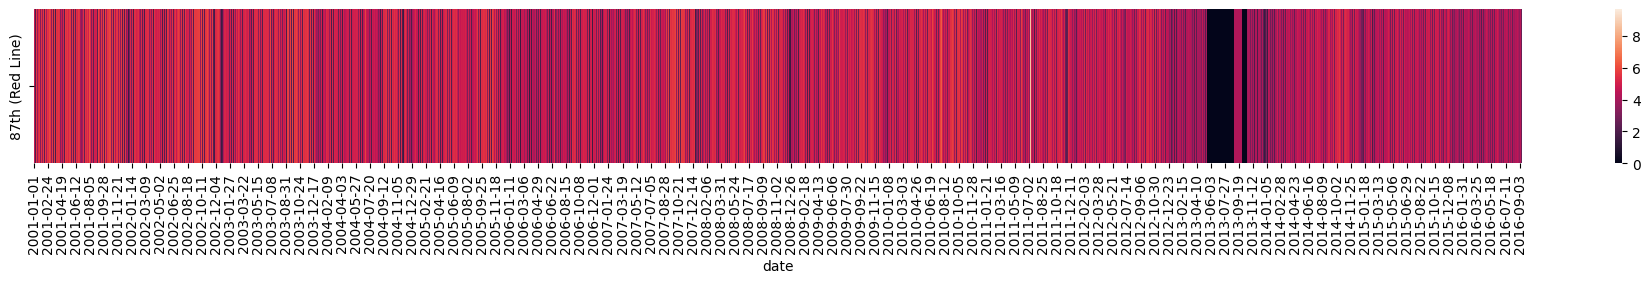

In [56]:
plt.figure(figsize=(24, 2))

sns.heatmap(
    chicago_raw_nona[['87th (Red Line)']].T,
)


<Axes: xlabel='date'>

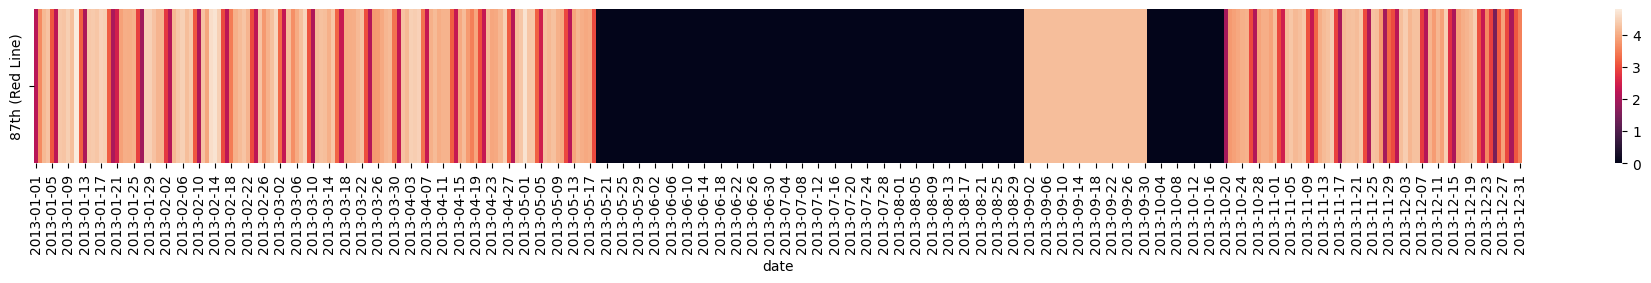

In [57]:
plt.figure(figsize=(24, 2))

sns.heatmap(
    pd.DataFrame(chicago_raw_nona.loc['2013-01-01':'2013-12-31', '87th (Red Line)']).T
)


In [58]:
chicago_raw_nona.loc[indices_of_missing[2], '87th (Red Line)']

np.float64(4.2144198667368045)

KNN Imputation

<Axes: xlabel='date'>

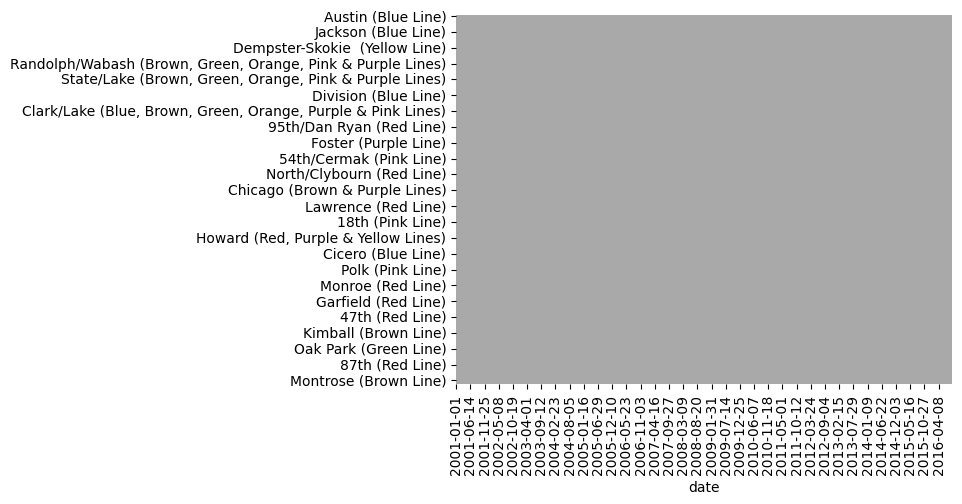

In [59]:
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")

chicago_raw_nona = chicago_raw.dropna(
    axis='columns',
    thresh=5733-30
)

chicago_raw_nona = pd.DataFrame(
    knn_imputer.fit_transform(chicago_raw_nona),
    columns = chicago_raw_nona.columns,
    index=chicago_raw_nona.index
)
sns.heatmap(
    chicago_raw_nona.isna().T,
    cbar=False,
    cmap=cmap,
    #linewidths=0.5
)


<Axes: xlabel='date'>

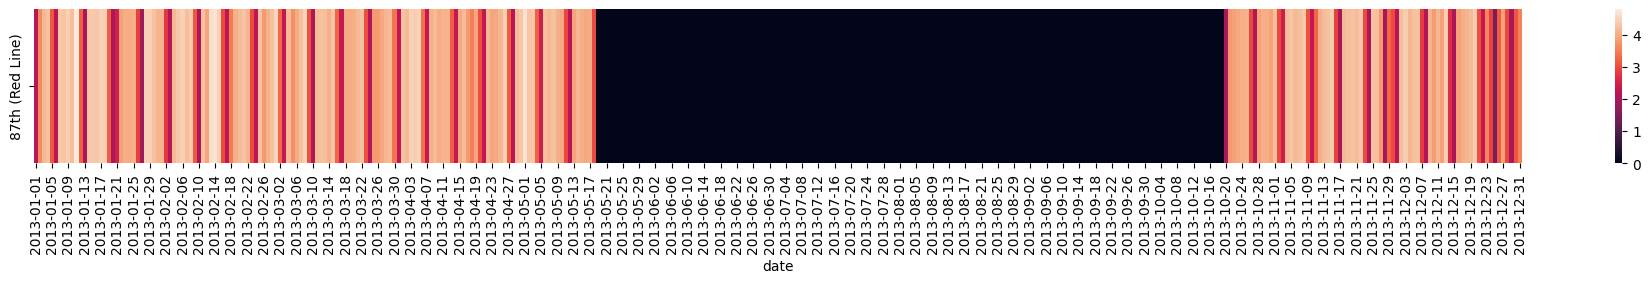

In [60]:
plt.figure(figsize=(24, 2))

sns.heatmap(
    pd.DataFrame(chicago_raw_nona.loc['2013-01-01':'2013-12-31', '87th (Red Line)']).T
)

Iterative imputer

In [88]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
iterative_imputer = IterativeImputer()

In [64]:
chicago_raw_nona = chicago_raw.dropna(
    axis='columns',
    thresh=5733-30
)

<Axes: xlabel='date'>

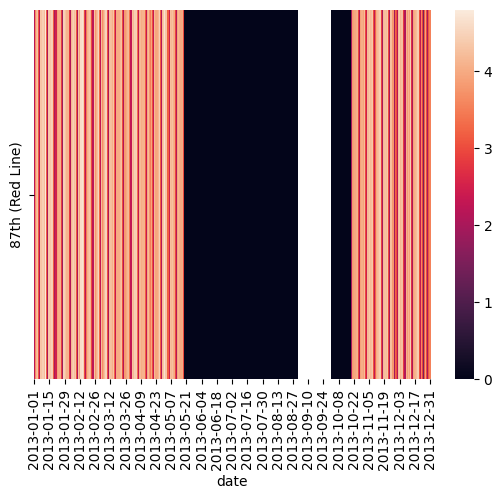

In [65]:

sns.heatmap(
    pd.DataFrame(chicago_raw_nona.loc['2013-01-01':'2013-12-31', '87th (Red Line)']).T
)

In [66]:
chicago_raw_nona = pd.DataFrame(
    iterative_imputer.fit_transform(chicago_raw_nona),
    columns = chicago_raw_nona.columns,
    index=chicago_raw_nona.index
)

/Users/timoschurg/Nextcloud/Lehre/feature_engineering/code/.venv/lib/python3.12/site-packages/sklearn/impute/_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


<Axes: xlabel='date'>

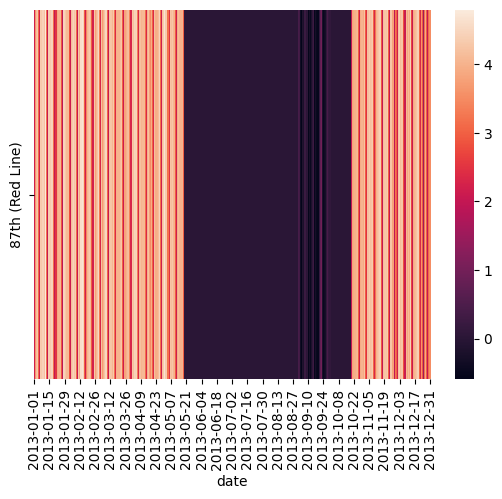

In [67]:

sns.heatmap(
    pd.DataFrame(chicago_raw_nona.loc['2013-01-01':'2013-12-31', '87th (Red Line)']).T
)

Imputing with trees

In [89]:
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
estimator = RandomForestRegressor(
    n_estimators=4,
    max_depth=10,
    bootstrap=True
)
iterative_imputer = IterativeImputer(estimator=estimator, max_iter=2)



/Users/timoschurg/Nextcloud/Lehre/feature_engineering/code/.venv/lib/python3.12/site-packages/sklearn/impute/_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


<Axes: xlabel='date'>

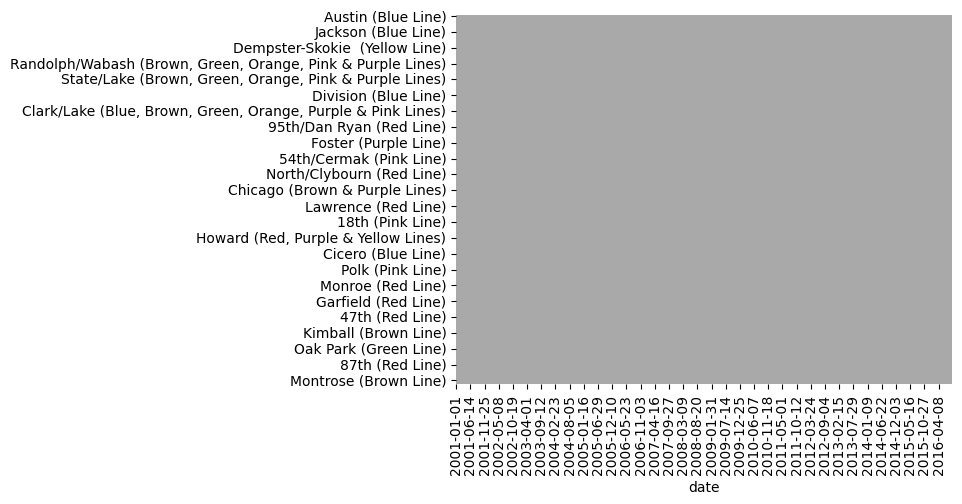

In [90]:
chicago_raw_nona = chicago_raw.dropna(
    axis='columns',
    thresh=5733-30
)

chicago_raw_nona = pd.DataFrame(
    iterative_imputer.fit_transform(chicago_raw_nona),
    columns = chicago_raw_nona.columns,
    index=chicago_raw_nona.index
)
sns.heatmap(
    chicago_raw_nona.isna().T,
    cbar=False,
    cmap=cmap,
    #linewidths=0.5
)

<Axes: xlabel='date'>

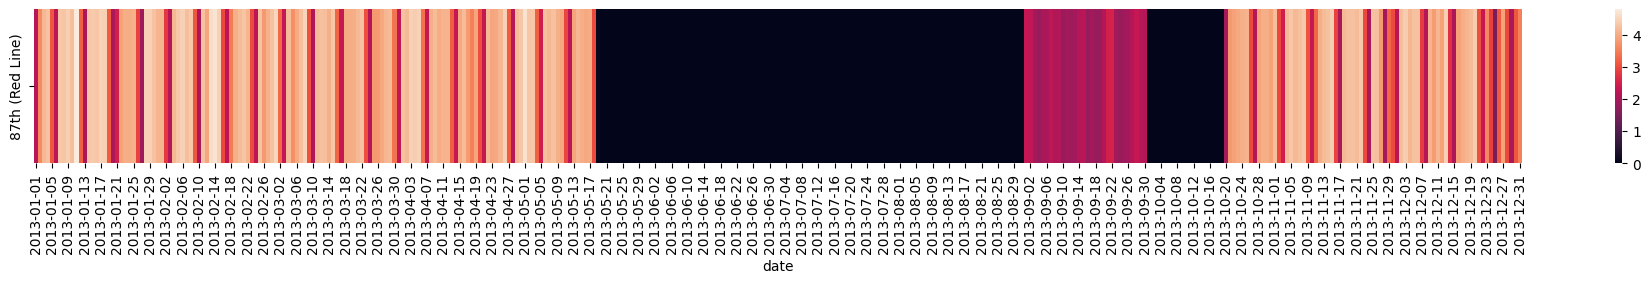

In [67]:
plt.figure(figsize=(24, 2))

sns.heatmap(
    pd.DataFrame(chicago_raw_nona.loc['2013-01-01':'2013-12-31', '87th (Red Line)']).T
)

Lineare Modelle fuer Imputation

<Axes: xlabel='79th (Red Line)', ylabel='79th (Red Line)'>

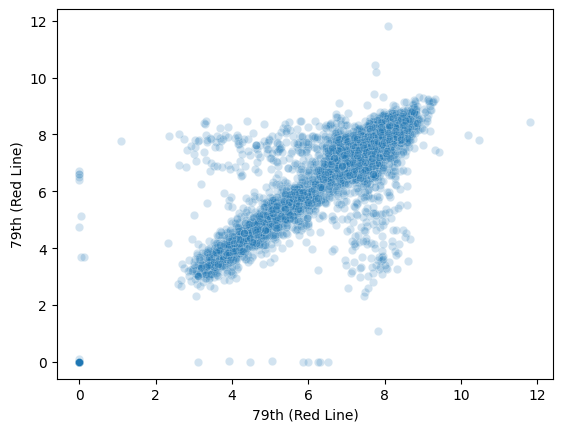

In [68]:
from seaborn import scatterplot
scatterplot(
    x=chicago_raw['79th (Red Line)'],
    y=chicago_raw['79th (Red Line)'].shift(7),
    alpha=0.2
)

In [69]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
X = chicago_raw[['79th (Red Line)']].dropna()
y = X['79th (Red Line)'].shift(7)
lin_reg.fit(
    X=X.iloc[7:,:],
    y=y[7:]
)

LinearRegression()